![OKCupid banner](./OKCupid.jpg)

# OK Cupid - Date a scientist!

## 1. Introduction
The aim of this project is to utilise data made available in public dating apps like "OK Cupid" to analyse dating trends and preferences. The ultimate goal is to develop a machine learning model that can make accurate predictions based on this dataset.

### Main Questions
* Which profile features are the most predictive of self-reported gender on OKCupid?
* Can lifestyle and demographic features predict whether a user owns pets?
* How accurately can a user's income be predicted based on demographic features?
* Which features have more importance in prediction across all models?

### Data Sources
The data utilised here, `profiles.csv` was obtained through the [Codecademy platform](https://www.codeademy.com).

## 2. Scope
### Project Goals
On this project I'll be performing data wrangling on the dataset provided and building accurate predictions through machine learning. The main question of this project revolves around which features have more weight across all models, allowing us to know which features should be more prominent when building models with similar characteristics.

### Data
The data used in this project was provided by [Codecademy](https://www.codeademy.com) and consists of one file named `profiles.csv` where each row corresponds to a user and each column is a response to one of the profile questions, and those can be either multiple choice or short answer.

### Analysis
We'll be exploring the data with EDA to understand the features and distributions of the variables and the relationship between them. We'll also build some machine learning models to make predictions using supervised algorithms.

### Evaluation
The project will conclude with an assessment of several models and a comparison between them using different metrics such as accuracy, precision, recall and F1. We'll identify which features are more important across all models, with higher correlations.

## 3. Exploratory Data Analysis
### Importing relevant libraries
Before we can start the proper data wrangling, we need to import the libraries and methods we'll be using throughout the project.

In [39]:
# Pandas and Numpy to be able to handle data
import pandas as pd
import numpy as np

# Plotting modules and libraries
from matplotlib import pyplot as plt
import seaborn as sns

# Machine learning related libraries and modules
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
from sklearn.feature_selection import RFE

### Loading the Data
As the data was too large to be uploadted as a `.csv` file directly to [GitHub](https://github.com/), it had to be uploaded as a `.zip` file, fortunately pandas can read the file directly from the compressed folder.

In [2]:
profiles = pd.read_csv('profiles.zip')

### Exploring the data
Let's start exploring the data now. The first thing I'll do is to display the top 3 rows of the dataframe, to make sure everything is loaded correctly. Next, I'll display column information and get summary statistics on the dataframe.

In [3]:
# Displaying the first 3 rows of the dataframe
display(profiles.head(3))

# Printing out information about the columns
profiles.info()

# Displaying summary statistics
profiles.describe()

,age,body_type,diet,drinks,drugs,education,essay0,essay1,essay2,essay3,...,location,offspring,orientation,pets,religion,sex,sign,smokes,speaks,status
0,22,a little extra,strictly anything,socially,never,working on college/university,about me:<br />\n<br />\ni would love to think...,currently working as an international agent fo...,making people laugh.<br />\nranting about a go...,"the way i look. i am a six foot half asian, ha...",...,"south san francisco, california","doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism and very serious about it,m,gemini,sometimes,english,single
1,35,average,mostly other,often,sometimes,working on space camp,i am a chef: this is what that means.<br />\n1...,dedicating everyday to being an unbelievable b...,being silly. having ridiculous amonts of fun w...,NaN,...,"oakland, california","doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism but not too serious about it,m,cancer,no,"english (fluently), spanish (poorly), french (...",single
2,38,thin,anything,socially,NaN,graduated from masters program,"i'm not ashamed of much, but writing public te...","i make nerdy software for musicians, artists, ...",improvising in different contexts. alternating...,my large jaw and large glasses are the physica...,...,"san francisco, california",NaN,straight,has cats,NaN,m,pisces but it doesn&rsquo;t matter,no,"english, french, c++",available


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59946 entries, 0 to 59945
Data columns (total 31 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          59946 non-null  int64  
 1   body_type    54650 non-null  object 
 2   diet         35551 non-null  object 
 3   drinks       56961 non-null  object 
 4   drugs        45866 non-null  object 
 5   education    53318 non-null  object 
 6   essay0       54458 non-null  object 
 7   essay1       52374 non-null  object 
 8   essay2       50308 non-null  object 
 9   essay3       48470 non-null  object 
 10  essay4       49409 non-null  object 
 11  essay5       49096 non-null  object 
 12  essay6       46175 non-null  object 
 13  essay7       47495 non-null  object 
 14  essay8       40721 non-null  object 
 15  essay9       47343 non-null  object 
 16  ethnicity    54266 non-null  object 
 17  height       59943 non-null  float64
 18  income       59946 non-null  int64  
 19  job 

,age,height,income
count,59946.000000,59943.000000,59946.000000
mean,32.340290,68.295281,20033.222534
std,9.452779,3.994803,97346.192104
min,18.000000,1.000000,-1.000000
25%,26.000000,66.000000,-1.000000
50%,30.000000,68.000000,-1.000000
75%,37.000000,71.000000,-1.000000
max,110.000000,95.000000,1000000.000000


From this initial exploratory analysis we observe that the dataset consists of 59,946 rows and 31 columns. Of these columns, three are continuous numerical variables: `age`, `height` and `income`, while the remainder are of `object` type, representing categorical data or free-text responses. <br>
Several columns contain missing values, especially `offspring`, `religion` and the essay related fileds. The presence of missing values may itself be informative, as non-response could reflect user preferences or sensitivity around certain topics.<br>
Further investigation reveals that the essay fields correspond to free-text responses in which users describe themselves, answering questions such as a self-summary, personal interests, and lifestyle descriptions as follows:
|Variable|Question|
|---|---|
|essay0|Self-Summary|
|essay1|What am I doing with my life?|
|essay2|I'm really good at...|
|essay3|The first thing people notice about me...|
|essay4|Favorite books, movies, show, music and food|
|essay5|Six things I could never do without|
|essay6|I spend a lot of time thinking about...|
|essay7|On a typical Friday night I am...|
|essay8|The most private thing I'm willing to admit|
|essay9|You should message me if...|

Examination of the numerical features reveals the presence of implausible values, such as maximum age of 110 years, or minimum height being 1 inch. These values suggest the existence of erroneous entries and potential outliers that will require cleaning or filtering prior to modeling.<br>
Finally, while the last_online variable would more appropriately be represented as a datetime object, it will not be converted in this project since it is not intended to be used as a predictive feature.


Based on this analysis, preprocessing steps will include handling missing values, encoding categorical variables, and addressing outliers in numerical features.
We can start by plotting the distribution of the numerical values.

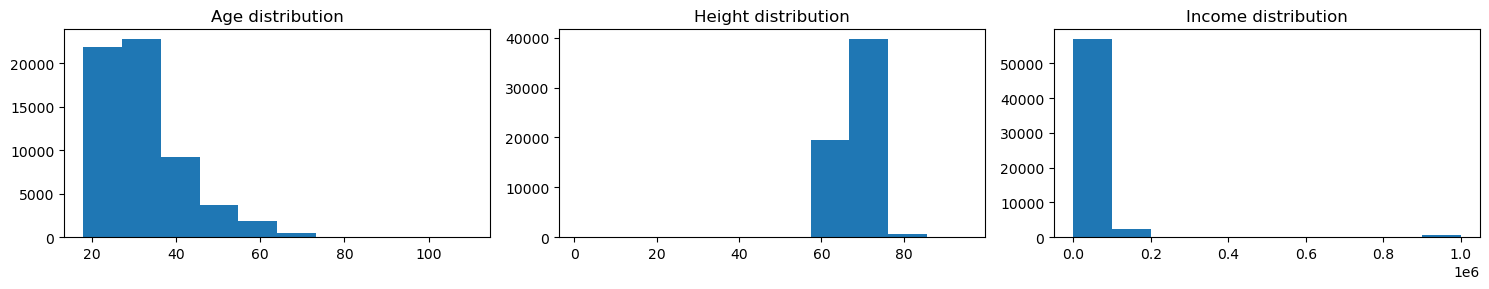

In [4]:
# Plotting the distribution of the numerical data
fig, ax = plt.subplots(1, 3, figsize = (15, 3))
ax[0].hist(profiles['age'])
ax[0].set_title('Age distribution')
ax[1].hist(profiles['height'])
ax[1].set_title('Height distribution')
ax[2].hist(profiles['income'])
ax[2].set_title('Income distribution')
plt.tight_layout()
plt.show()

In [5]:
# Investigating implausible values in numerical features
display(profiles[profiles['age']>70].head(5))
print(profiles['height'][profiles['height']<50].value_counts())
print (profiles['height'][profiles['height']>85].value_counts())
print (profiles['income'][profiles['income']<10000].value_counts())

,age,body_type,diet,drinks,drugs,education,essay0,essay1,essay2,essay3,...,location,offspring,orientation,pets,religion,sex,sign,smokes,speaks,status
2512,110,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,"daly city, california",NaN,straight,NaN,NaN,f,NaN,NaN,english,single
25324,109,athletic,mostly other,NaN,never,working on masters program,NaN,NaN,NaN,nothing,...,"san francisco, california",might want kids,straight,NaN,other and somewhat serious about it,m,aquarius but it doesn&rsquo;t matter,when drinking,english (okay),available


height
36.0    11
43.0     2
48.0     2
37.0     2
8.0      1
3.0      1
42.0     1
6.0      1
47.0     1
49.0     1
9.0      1
1.0      1
26.0     1
4.0      1
Name: count, dtype: int64
height
95.0    20
91.0     3
94.0     3
88.0     2
87.0     1
93.0     1
86.0     1
90.0     1
92.0     1
89.0     1
Name: count, dtype: int64
income
-1    48442
Name: count, dtype: int64


The information displayed above revealed the presence of implausible data:
* Age: Ages above 80 years old are very unlikely in dating apps, so the rows where the data is specified as 109 and 110 are either fake or mistakes. These values are considered outliers and, even if they represent a very small fraction of the data, they can still skew the analysis.
* Height: Values below 50 inches and above 85 inches are very unlikely for healthy adult human beings, so those datapoints can also be considered fake or erroneous.
* Income: The data is heavily skewed towards the value `-1`, which is not a real income value, but instead indicates that the user didn't disclose their income, therefore this data does not represent actual income information.


Based on this we can safely remove the rows where `age` is over 80, and `height` is under 50 and over 85 inches. As for income, we can replace the `-1` values present in the data for `NaN` values, which is what it really represents.

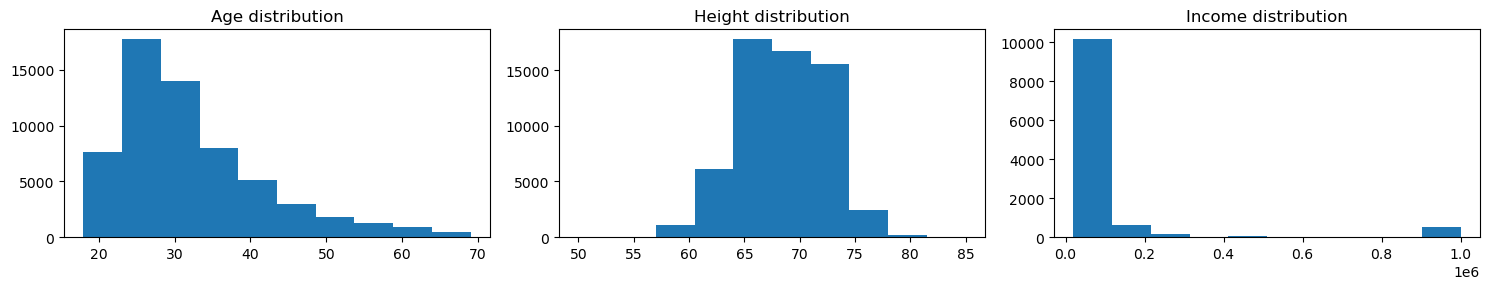

In [6]:
# Clean age, height and income
profiles = profiles[(profiles['age'] >= 18) & (profiles['age'] <= 80)]
profiles = profiles[(profiles['height'] >= 50) & (profiles['height'] <= 85)]
profiles['income'] = profiles['income'].replace(-1, np.nan)

# Re-Plotting the distribution of the numerical data
fig, ax = plt.subplots(1, 3, figsize = (15, 3))
ax[0].hist(profiles['age'])
ax[0].set_title('Age distribution')
ax[1].hist(profiles['height'])
ax[1].set_title('Height distribution')
ax[2].hist(profiles['income'])
ax[2].set_title('Income distribution')
plt.tight_layout()
plt.show()

This plot representation is more realistic and better shows the distribution of our numerical features.

## 4. Prediction algorithms
### 4.1 Which profile features are the most predictive of self-reported gender on OKCupid?
Now that the initial exploratory data analysis has been done and the data has been cleaned, we can begin addressing our research questions. To discern which features more strongly influence the prediction of a user's gender, we define the target variable as `sex` and select the following feature set: `age`, `height`, `education`, `job`, `smokes`, `drinks`, `body_type` and `diet`.

Since the target variable is binary (the user is reporting as male or female), a `Logistic Regression` is the appropriate choice for this task. 
Before fitting the model, all categorical variables must be encoded, and the dataset must be split into training and testing subsets to allow for proper evaluation of model performance.

In [7]:
# Displaying the values of the categorical features to get a feeling of their representation
print(profiles['education'].value_counts(), '\n')
print(profiles['job'].value_counts(), '\n')
print(profiles['smokes'].value_counts(), '\n')
print(profiles['drinks'].value_counts(), '\n')
print(profiles['body_type'].value_counts(), '\n')
print(profiles['diet'].value_counts(), '\n')

education
graduated from college/university    23944
graduated from masters program        8957
working on college/university         5709
working on masters program            1682
graduated from two-year college       1529
graduated from high school            1425
graduated from ph.d program           1270
graduated from law school             1120
working on two-year college           1072
dropped out of college/university      995
working on ph.d program                982
college/university                     799
graduated from space camp              654
dropped out of space camp              518
graduated from med school              446
working on space camp                  443
working on law school                  269
two-year college                       222
working on med school                  212
dropped out of two-year college        191
dropped out of masters program         140
masters program                        136
dropped out of ph.d program            127
d

The categorical features have a high number of different values that we need to encode. To achieve this, we'll need to transform the features by binning them to reduce the dimensionality of the dataframe:
* `education`: `Masters/PhD`, `University/College`, `Highschool`, `Other`
* `job`: `Tech/Engineering`, `Arts/Media`, `Business/Finance`, `Medical/Health`, `Education`, `Law/Politics`, `Hospitality/Travel`, `Trades/Construction`, `Clerical/Admin`, `Student`, `Other`
* `body_type`: `Average/Athletic`, `Think/Skinny`, `Curvy/Full`, `Very Muscular`, `Other`
* `diet`: `Unrestricted`, `Vegetarian`, `Vegan`, `Halal/Kosher`, `Other`

In [8]:
# Defining functions to bin the features
def bin_education(edu):
    edu = str(edu).lower()
    if 'masters' in edu or 'ph.d' in edu:
        return 'Masters/PhD'
    elif 'college' in edu:
        return 'University/College'
    elif 'high school' in edu:
        return 'Highschool'
    else:
        return 'Other'

def bin_job(job):
    job = str(job).lower()
    if 'tech' in job or 'computer' in job or 'engineering' in job:
        return 'Tech/Engineering'
    elif 'artistic' in job or 'musical' in job or 'writer' in job or 'media' in job or 'entertainment' in job:
        return 'Arts/Media'
    elif 'sales' in job or 'marketing' in job or 'biz dev' in job or 'executive' in job or 'management' in job or 'financial' in job or 'banking' in job or 'real estate' in job:
        return 'Business/Finance'
    elif 'medicine' in job or 'health' in job:
        return 'Medical/Health'
    elif 'education' in job or 'academia' in job:
        return 'Education'
    elif 'law' in job or 'legal' in job or 'political' in job or 'government' in job:
        return 'Law/Politics'
    elif 'hospitality' in job or 'travel' in job or 'transportation' in job:
        return 'Hospitality/Travel'
    elif 'construction' in job or 'craftsmanship' in job:
        return 'Trades/Construction'
    elif 'clerical' in job or 'administrative' in job:
        return 'Clerical/Admin'
    elif 'student' in job:
        return 'Student'
    else:
        return 'Other'

def bin_body_type(bt):
    bt = str(bt).lower()
    if 'average' in bt or 'fit' in bt or 'athletic' in bt:
        return 'Average/Athletic'
    elif 'thin' in bt or 'skinny' in bt:
        return 'Thin/Skinny'
    elif 'curvy' in bt or 'full' in bt or 'fat' in bt:
        return 'Curvy/Full'
    elif 'jacked' in bt:
        return 'Very Muscular'
    else:
        return 'Other'

def bin_diet(d):
    d = str(d).lower()
    if 'anything' in d:
        return 'Unrestricted'
    elif 'vegetarian' in d:
        return 'Vegetarian'
    elif 'vegan' in d:
        return 'Vegan'
    elif 'halal' in d or 'kosher' in d:
        return 'Halal/Kosher'
    else:
        return 'Other/Unknown'

# Applying the functions so the features are binned
profiles['education_bin'] = profiles['education'].apply(bin_education)
profiles['job_bin'] = profiles['job'].apply(bin_job)
profiles['body_type_bin'] = profiles['body_type'].apply(bin_body_type)
profiles['diet_bin'] = profiles['diet'].apply(bin_diet)

In [9]:
# Dividing the data into target and feature dataframes
profiles['sex'] = (profiles['sex'] == 'm').astype(int)
X = profiles[['age', 'height', 'education_bin', 'job_bin', 'smokes', 'drinks', 'body_type_bin', 'diet_bin']]
y = profiles['sex']

Since the necessary features are now binned into appropriate categories and the target and features dataframes are instanced, we can proceed by One-hot Encoding the dataframe.

In [10]:
X = pd.get_dummies(X, drop_first=True)

The next step is to separate the `X` dataframe into train and test sets.

In [11]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

We are now ready to instanciate a `Logistic Regressor` and fit it.

In [12]:
logreg = LogisticRegression(max_iter = 10000)
logreg.fit(x_train, y_train)

LogisticRegression(max_iter=10000)

We can now use or test set to confirm the accuracy and other relevant scores of our predictor.

In [13]:
y_pred = logreg.predict(x_test)

print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
print(f'Precision: {precision_score(y_test, y_pred)}')
print(f'Recall: {recall_score(y_test, y_pred)}')
print(f'F1: {f1_score(y_test, y_pred)})')

Accuracy: 0.8732570760624531
Precision: 0.8827019010381556
Recall: 0.9099374565670605
F1: 0.8961127840131399)


From the calculated scores, we can confirm that the model's performance is good:
* Accuracy is 87.3%, meaning that most predictions were correct
* Precision is 88.3%, confirming we had few false positives
* Recall is 91%, showing the model had few false negatives as well
* F1 score is 89.6%, meaning the model is both accurate and balanced in predicitons.

These scores mean that the model is doing well at predicting the gender of a user, and that the model is not biased towards one gender or another.

Looking at the coeficients we can identify which features influence the prediction the most.

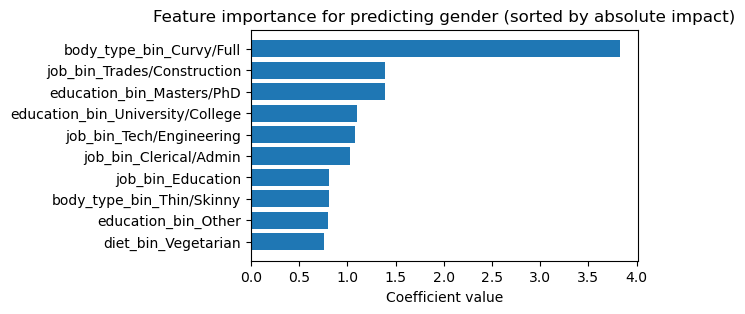

In [14]:
#Getting the coeficients
coef_df = pd.DataFrame({
    'feature': x_train.columns,
    'coefficient': logreg.coef_[0]  # 0 because coef_ is 2D array
})

# Sort by absolute effect
coef_df['coefficient'] = coef_df['coefficient'].abs()
coef_df = coef_df.sort_values(by='coefficient', ascending=False)

# Displaying a plot of coeficient weight
plt.figure(figsize=(5,3))
plt.barh(coef_df['feature'].head(10), coef_df['coefficient'].head(10))
plt.xlabel('Coefficient value')
plt.title('Feature importance for predicting gender (sorted by absolute impact)')
plt.gca().invert_yaxis()
plt.show()

Above we can see a plot of the 10 one-hot encoded features with more weight on deciding the prediction value, but that does't give us the original features with more weight. To do that, we need to separate the features by original variable and aggregate the coefficients per original feature.

In [15]:
# Function to get the original variable name
def original_var(name):
    if '_' in name:
        return name.split('_')[0]  # e.g., 'education_graduated from college/university' → 'education'
    else:
        return name  # for numeric variables like 'age', 'height'

coef_df['original_feature'] = coef_df['feature'].apply(original_var)

# Agreggating coefficients
agg_df = coef_df.groupby('original_feature')['coefficient'].apply(lambda x: np.sum(np.abs(x))).reset_index()
agg_df = agg_df.sort_values(by='coefficient', ascending=False)

print(agg_df)

  original_feature  coefficient
6              job     5.889898
1             body     5.339829
4        education     3.298842
2             diet     1.413169
7           smokes     0.962214
3           drinks     0.901765
5           height     0.665959
0              age     0.010071


From here, we can see that the features that are more predictive of a user's gender are `job`, `body` and `education`.

### 4.2 Can lifestyle and demographic features predict whether a user owns pets?
The next step of our research is to confirm if we can predict whether a user owns pets. To do this, we follow a similar logic to the one used earlier, where we set a target and feature dataframes, and encode them. We will need to determine if a user is a pet owner, and if true, which pets. This is accomplished by building two models, a binary model that helps us discover if a user is likely to have pets, and if affirmative, a multiclasse model that can tell us which types of pet the person is likely to have.

In [16]:
# Confirming how the pets feature is compose, as this will be our target feature
profiles['pets'].value_counts()

pets
likes dogs and likes cats          14799
likes dogs                          7221
likes dogs and has cats             4309
has dogs                            4131
has dogs and likes cats             2328
likes dogs and dislikes cats        2028
has dogs and has cats               1472
has cats                            1404
likes cats                          1062
has dogs and dislikes cats           549
dislikes dogs and likes cats         237
dislikes dogs and dislikes cats      195
dislikes cats                        122
dislikes dogs and has cats            81
dislikes dogs                         44
Name: count, dtype: int64

As the target feature, we will use the `pets` feature. this feature is composed of several elements that state whether a person has any cats or dogs, likes cats or dogs or dislikes them. For our analysis, we are interested in splitting our feature into two separate ones, one which tells us if a user is a pet owner (`has_pet`), and one which conveys which kind of pet (`pet_type`). Pet type will look like this:
* `cats_and_dogs` - if a person has cats and dogs
* `cats` - if a person has cats only
* `dogs` - if a person has dogs only
* `NaN` - if a person doesn't own either


Once both features are ready, we'll use One-Hot Encoding on the dataset.

In [31]:
# Defining binning functions
def has_pet(pet):
    pet = str(pet).lower()
    return int('has dogs' in pet or 'has cats' in pet)

def categorize_pets(pet):
    pet = str(pet).lower()
    if 'has dogs' in pet and 'has cats' in pet:
        return 'cats_and_dogs'
    elif 'has dogs' in pet:
        return 'dogs'
    elif 'has cats' in pet:
        return 'cats'
    else:
        return np.nan
        
# Applying the functions
profiles['has_pet'] = profiles['pets'].apply(has_pet)
profiles['pets_bin'] = profiles['pets'].apply(categorize_pets)

# Selecting the feature set
X = profiles[['age', 'height', 'sex', 'education_bin', 'job_bin', 'smokes', 'drinks', 'body_type', 'diet_bin']]

# One hot encoding
X = pd.get_dummies(X, drop_first=False)

# Does the user has a pet?
y_pet = profiles['has_pet']

# Doing the train-test split
x_train, x_test, y_train, y_test = train_test_split(X, y_pet, test_size = 0.2, random_state = 42)

Now that we encoded our features, separated the feature and target dataframes and separated our sets into train and test sets, we can apply a classifier. Again, we're using a logistic regressor, as we have a binary category, wich tells us either a person has a pet or not.

In [32]:
# Instanciating the classifier and fitting it into the train set
logreg_pet_owner = LogisticRegression(max_iter = 10000, class_weight = 'balanced') 
# class_weight = balanced to balance the weights for the class imbalance
logreg_pet_owner.fit(x_train, y_train)

# Evaluating the classifier
y_pred = logreg_pet_owner.predict(x_test)

print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
print(f'Precision: {precision_score(y_test, y_pred)}')
print(f'Recall: {recall_score(y_test, y_pred)}')
print(f'F1: {f1_score(y_test, y_pred)}\n')

# Checking which features have higher coeficients

coef_df = pd.DataFrame({
    'feature': x_train.columns,
    'coef': logreg_pet_owner.coef_[0]
}).sort_values(by='coef', key=abs, ascending=False)
print(coef_df.head())

Accuracy: 0.6135927193788094
Precision: 0.33039309683604984
Recall: 0.60265827212312
F1: 0.42680208075303444

                  feature      coef
2                     sex -0.733227
36   body_type_overweight  0.664088
24      drinks_not at all  0.658622
20  smokes_trying to quit  0.634262
26          drinks_rarely  0.629923


The model achieves a moderate F1 score, with recall noticeably higher than precision. This indicates that the classifier is relatively effective at identifying users who own pets, but at the cost of incorrectly classifying a substantial number of non–pet owners as pet owners.

This behavior is expected given the imbalance in the target variable and the use of class weighting, which prioritizes correctly identifying pet owners over minimizing false positives. As a result, accuracy is not the most informative metric in this context, and the F1 score provides a more balanced evaluation of the model’s performance.

This task appears inherently more challenging than predicting gender, as pet ownership is influenced by many external factors not represented in the dataset.


When looking at the stronget coeficients, it's noticeable that `sex` is the strongers predictor identifying females as more likely to own pets (as in our `sex` feature `m=1`), and lifestyle features like dirnking or smoking seem to outweigh socioeconomic ones.

Let's now look into the users that have pets, and try to predict if they have cats, dogs or both.

Classification report:

               precision    recall  f1-score   support

         cats       0.54      0.46      0.50      1180
cats_and_dogs       0.14      0.41      0.21       280
         dogs       0.62      0.47      0.54      1395

     accuracy                           0.46      2855
    macro avg       0.44      0.45      0.42      2855
 weighted avg       0.54      0.46      0.49      2855



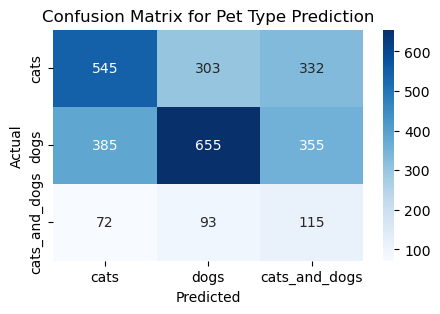

In [43]:
# Only keep users who own pets
owners = profiles[profiles['has_pet'] == 1].copy()

# Features (reuse binned and one-hot encoded features)
X_pet_type = owners[['age', 'height', 'sex', 'education_bin', 'job_bin', 'smokes', 'drinks', 'body_type', 'diet_bin']]
X_pet_type = pd.get_dummies(X_pet_type, drop_first=False)

# Target: cats / dogs / cats_and_dogs
y_pet_type = owners['pets_bin']

# Train-test split
x_train, x_test, y_train, y_test = train_test_split(X_pet_type, y_pet_type, test_size=0.2, random_state=42)

# Multiclass Logistic Regression
logreg_pet_type = LogisticRegression(max_iter=10000, class_weight='balanced', solver = 'lbfgs')
logreg_pet_type.fit(x_train, y_train)

# Predictions
y_pred = logreg_pet_type.predict(x_test)

# Evaluation
print("Classification report:\n")
print(classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred, labels=y_pet_type.unique())
plt.figure(figsize=(5,3))
sns.heatmap(cm, annot=True, fmt='d', 
            xticklabels=y_pet_type.unique(), 
            yticklabels=y_pet_type.unique(), cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Pet Type Prediction')
plt.show()

This target is proving harder to predict, largely due to class imbalance. The model struggles especially with the cats_and_dogs class, predicting it correctly only 41% of the time, and sometimes misclassifies cats as dogs and vice versa. Overall, the model correctly predicts around 46% of cases, so it is capturing some of the patterns, but there is room for improvement.

Let's apply a Recursice Feature Elimination model to verify if we can improve our predictions.

Best n_features: 22, Weighted F1: 0.447


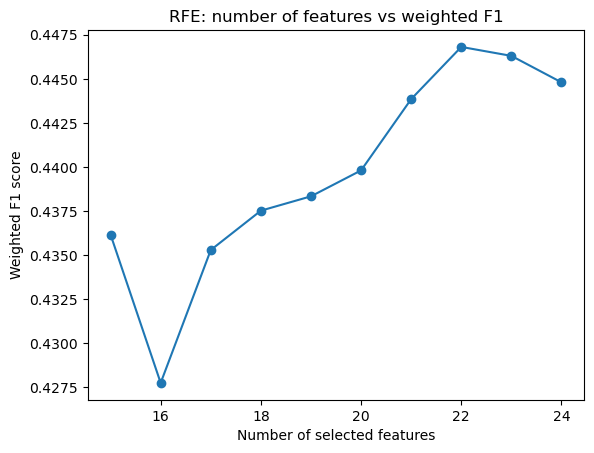

In [48]:
# Try n_features from 15 up to total number of features
# Store results
results = []
for n in range(15, 25):
    # Applying the RFE on our logistic regression classifier
    rfe = RFE(logreg_pet_type, n_features_to_select=n)
    rfe.fit(x_train, y_train)
    
    # Printing the selected features
    selected_features = x_train.columns[rfe.support_]
    
    logreg_pet_type.fit(x_train[selected_features], y_train)
    y_pred = logreg_pet_type.predict(x_test[selected_features])
    f1 = f1_score(y_test, y_pred, average='weighted')
    
    results.append((n, f1))


# Find best number of features
best_n, best_f1 = max(results, key=lambda x: x[1])
print(f'Best n_features: {best_n}, Weighted F1: {best_f1:.3f}')

# Optional: plot
import matplotlib.pyplot as plt
n_feats, f1_scores = zip(*results)
plt.plot(n_feats, f1_scores, marker='o')
plt.xlabel('Number of selected features')
plt.ylabel('Weighted F1 score')
plt.title('RFE: number of features vs weighted F1')
plt.show()

Above we can see a plot showing the optimal number of features to increase the f1 score of the classifier. We'll now print a list of the optimal features to achieve that score.

*Note: I had, on a previous iteration come to the conclusion that a higher number of features than 15 was better for the model, but as it would just be repeting steps already done, I've decided to go straight to the `for` loop with the plot of the results for the f1 score.*

In [53]:
# Refit RFE with the best number of features
rfe_best = RFE(logreg_pet_type, n_features_to_select=best_n)
rfe_best.fit(x_train, y_train)

# Get the selected features
best_features = x_train.columns[rfe_best.support_]
print("Selected features for best F1 score:")
for feat in best_features:
    print("-", feat)

# Optional: Fit and evaluate one last time
logreg_pet_type.fit(x_train[best_features], y_train)
y_pred_best = logreg_pet_type.predict(x_test[best_features])
print(f'''\nWeighted scores on test set with best features: \nAccuracy score:{accuracy_score(y_test, y_pred_best):.3f}
\nPrecision score:{precision_score(y_test, y_pred_best, average='weighted'):.3f}
\nRecall score:{recall_score(y_test, y_pred_best, average='weighted'):.3f}
\nF1 score:{f1_score(y_test, y_pred_best, average='weighted'):.3f}''')

Selected features for best F1 score:
- sex
- education_bin_Highschool
- education_bin_Masters/PhD
- job_bin_Arts/Media
- job_bin_Clerical/Admin
- job_bin_Education
- job_bin_Tech/Engineering
- smokes_no
- smokes_sometimes
- smokes_trying to quit
- smokes_when drinking
- smokes_yes
- drinks_desperately
- drinks_rarely
- drinks_very often
- body_type_athletic
- body_type_full figured
- body_type_jacked
- body_type_overweight
- body_type_used up
- diet_bin_Halal/Kosher
- diet_bin_Vegan

Weighted scores on test set with best features: 
Accuracy score:0.413

Precision score:0.519

Recall score:0.413

F1 score:0.447


These values indicate that the model struggles to predict the specific type of pet a user owns. The selected features have the most impact on the prediction, but even with the optimal subset, the model correctly classifies the type of pet less than half the time (F1 ~0.45). This reflects the difficulty of the task, likely due to class imbalance and overlapping patterns among pet owners. The scores suggest that while some predictive signal exists, predictions should be interpreted with caution.